In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import io

In [2]:
df = pd.read_csv("airlines_delay.csv")
df.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539382 entries, 0 to 539381
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Flight       539382 non-null  float64
 1   Time         539382 non-null  float64
 2   Length       539382 non-null  float64
 3   Airline      539382 non-null  object 
 4   AirportFrom  539382 non-null  object 
 5   AirportTo    539382 non-null  object 
 6   DayOfWeek    539382 non-null  int64  
 7   Class        539382 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 32.9+ MB


In [4]:
df.rename(columns={"Flight": "Flight_ID",
                   "Time": "Time_of_departure",
                   "Length": "Length_of_Fligh",
                   "Airline": "Airline_ID"}, inplace=True,)

In [5]:
data_details = {'unique':df.nunique(),
              'dtype':df.dtypes,
             'null':df.isna().sum(),
             }
data_details = pd.DataFrame(data_details)
data_details

,unique,dtype,null
Flight_ID,6585,float64,0
Time_of_departure,1131,float64,0
Length_of_Fligh,426,float64,0
Airline_ID,18,object,0
AirportFrom,293,object,0
AirportTo,293,object,0
DayOfWeek,7,int64,0
Class,2,int64,0


In [6]:
df.describe().T.style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
Flight_ID,539382.000000,2427.927988,2067.431700,1.000000,712.000000,1809.000000,3745.000000,7814.000000
Time_of_departure,539382.000000,802.728161,278.045546,10.000000,565.000000,795.000000,1035.000000,1439.000000
Length_of_Fligh,539382.000000,132.202104,70.117045,0.000000,81.000000,115.000000,162.000000,655.000000
DayOfWeek,539382.000000,3.929666,1.914666,1.000000,2.000000,4.000000,5.000000,7.000000
Class,539382.000000,0.445443,0.497015,0.000000,0.000000,0.000000,1.000000,1.000000


In [7]:
categorical_col = df.select_dtypes('object')

for i in categorical_col:
    print(f'value counts of {i} column')
    print(df[i].value_counts(), end="\n\n")

value counts of Airline_ID column
WN    94097
DL    60940
OO    50254
AA    45656
MQ    36604
US    34500
XE    31126
EV    27983
UA    27619
CO    21118
FL    20827
9E    20686
B6    18112
YV    13725
OH    12630
AS    11471
F9     6456
HA     5578
Name: Airline_ID, dtype: int64

value counts of AirportFrom column
ATL    34449
ORD    24822
DFW    22153
DEN    19843
LAX    16657
       ...  
MMH       16
SJT       15
GUM       10
ADK        9
ABR        2
Name: AirportFrom, Length: 293, dtype: int64

value counts of AirportTo column
ATL    34440
ORD    24871
DFW    22153
DEN    19848
LAX    16656
       ...  
MMH       16
SJT       15
GUM       10
ADK        9
ABR        2
Name: AirportTo, Length: 293, dtype: int64



In [8]:
df.head()

,Flight_ID,Time_of_departure,Length_of_Fligh,Airline_ID,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0


## Data Visualization

In [9]:
columns_value_counts = df[['Class', 'DayOfWeek', 'Airline_ID']]

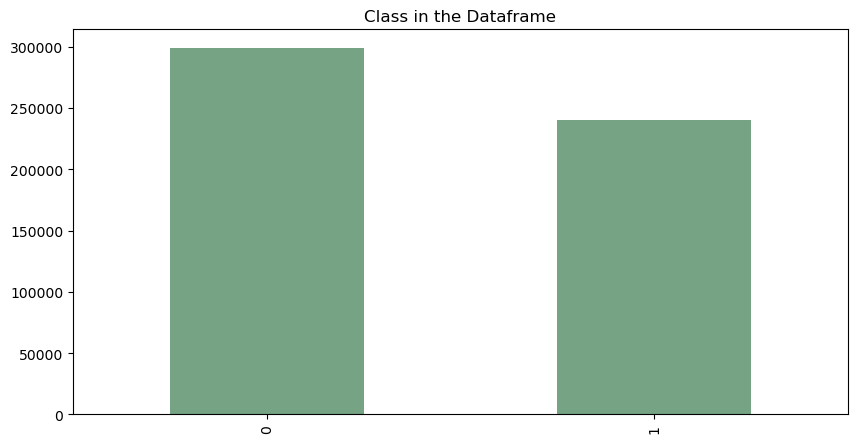

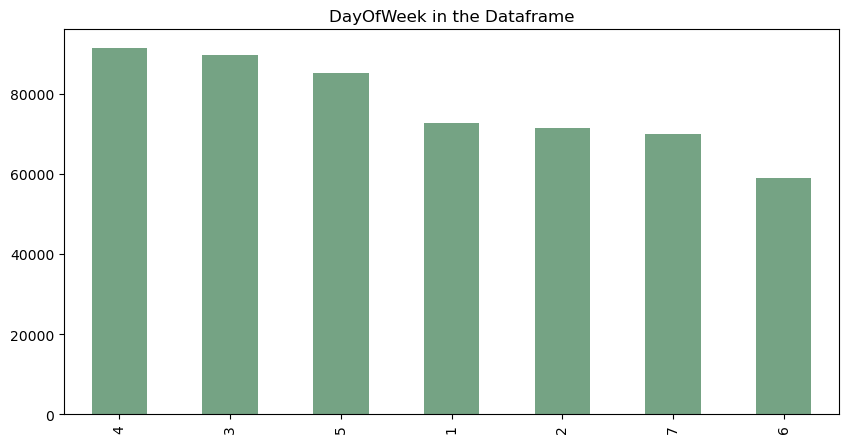

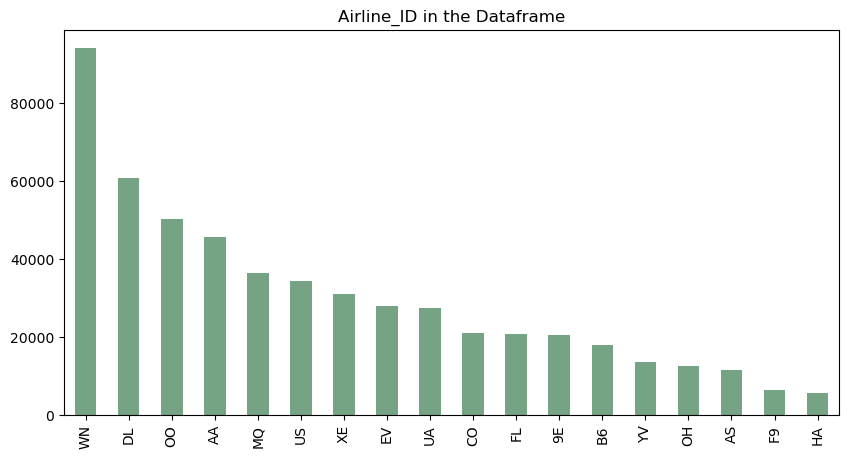

In [10]:
for i in columns_value_counts:
    columns_value_counts[i].value_counts().plot(kind ='bar', figsize=(10,5), title='{} in the Dataframe'.format(i), color=(0.1, 0.4, 0.2, 0.6))
    plt.show()

array([[<AxesSubplot:title={'center':'Flight_ID'}>,
        <AxesSubplot:title={'center':'Time_of_departure'}>],
       [<AxesSubplot:title={'center':'Length_of_Fligh'}>,
        <AxesSubplot:title={'center':'DayOfWeek'}>],
       [<AxesSubplot:title={'center':'Class'}>, <AxesSubplot:>]],
      dtype=object)

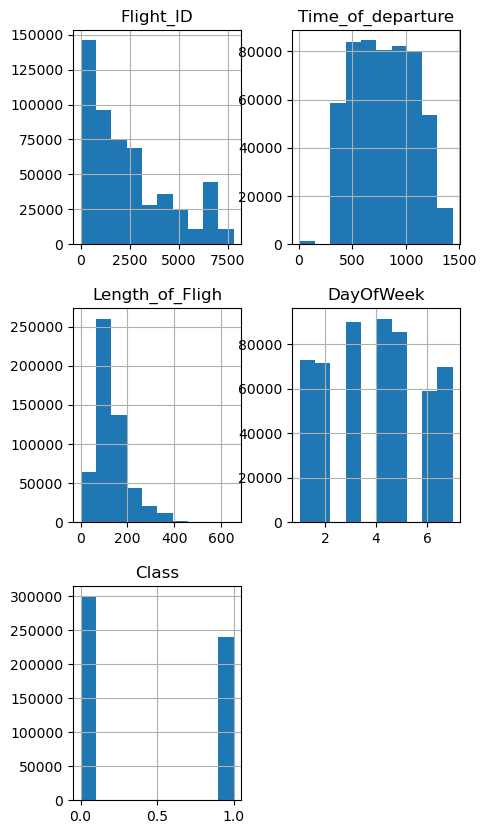

In [11]:
fig = plt.figure(figsize = (5,10))
ax = fig.gca()
df.hist(ax = ax)

The scale of the data will affect on the models that we want to apply so some features will need to be rescaled

<AxesSubplot:>

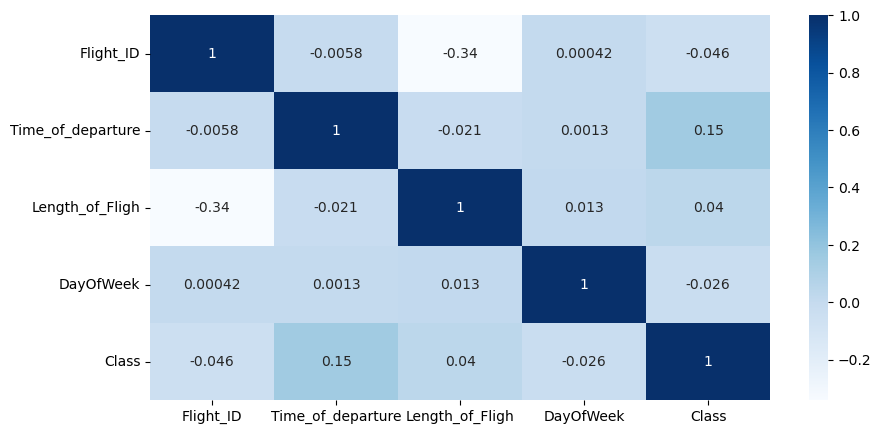

In [12]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

## Feature Engineering and Data Re_processing

In [13]:
df.head()

,Flight_ID,Time_of_departure,Length_of_Fligh,Airline_ID,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0


In [14]:
df.Class.value_counts()

0    299118
1    240264
Name: Class, dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
df[['Time_of_departure','Length_of_Fligh']]=MinMaxScaler().fit_transform(df[['Time_of_departure','Length_of_Fligh']])

In [16]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
df['AirportTo']=LabelEncoder().fit_transform(df['AirportTo'])
df['AirportFrom']=LabelEncoder().fit_transform(df['AirportFrom'])
df['Airline_ID']=LabelEncoder().fit_transform(df['Airline_ID'])

In [17]:
df[['AirportTo','AirportFrom', 'Airline_ID', 'DayOfWeek']]=MinMaxScaler().fit_transform(df[['AirportTo','AirportFrom', 'Airline_ID', 'DayOfWeek']])

<AxesSubplot:ylabel='Frequency'>

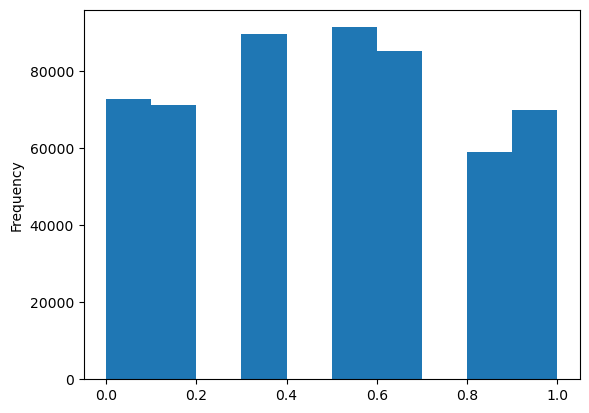

In [18]:
df.DayOfWeek.plot(kind='hist')

In [19]:
df = df.drop(['Flight_ID'],  axis=1)

In [20]:
df.to_csv('preprocessed_data.csv')